In [42]:
import os
import sys
folder_a_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(folder_a_path)
import json
import matplotlib.pyplot as plt
from data_provider.data_split_recorder import split_recorder

In [43]:
def set_ax_linewidth(ax, bw=1.5):
    ax.spines['bottom'].set_linewidth(bw)
    ax.spines['left'].set_linewidth(bw)
    ax.spines['top'].set_linewidth(bw)
    ax.spines['right'].set_linewidth(bw)

def set_ax_font_size(ax, fontsize=10):
    ax.tick_params(axis='y',
                 labelsize=fontsize # y轴字体大小设置
                  ) 
    ax.tick_params(axis='x',
                 labelsize=fontsize # x轴字体大小设置
                  ) 

def set_draft(the_plt, other_ax=''):
    ax = the_plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.xlabel('')
    plt.ylabel('')
    if other_ax:
        other_ax.axes.xaxis.set_ticklabels([])
        other_ax.axes.yaxis.set_ticklabels([])
        other_ax.set_ylabel('')
        other_ax.set_xlabel('')

def set_draft_fig(fig):
    for ax in fig.axes:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        ax.set_ylabel('')
        ax.set_xlabel('')

In [44]:
data_path = '../gate_data'
gate_data = 'temperatures' # temperatures, cathodes, anodes
target = 'Na'

data = json.load(open(f'{data_path}/{gate_data}.json'))
training_data = split_recorder.MIX_large_train_files
print(len(training_data))
gate_frequency = {}
for key, value in data.items():
    # print(key)
    # if target == 'Na' and not key.startswith('NA-ion'):
    #     continue
    # if target == 'Zn' and not key.startswith('ZN-ion'):
    #     continue

    if not key in training_data:
        continue
    if gate_data == 'temperatures':
        pass
    elif gate_data == 'cathodes':
        value = '_'.join(value)
    elif gate_data == 'formats':
        # value = '_'.join(value)
        value = value[0]
    else:
        value = value[0]
    gate_frequency[value] = gate_frequency.get(value, 0) + 1


if gate_data == 'temperatures':
    gate_frequency = {k: v for k, v in sorted(gate_frequency.items(), key=lambda item: item[0])}
    print(gate_frequency)
else:
    print(gate_frequency)

515
{-5.0: 5, 15.0: 5, 20.0: 15, 23.0: 2, 25.0: 108, 30.0: 318, 35.0: 15, 45.0: 47}


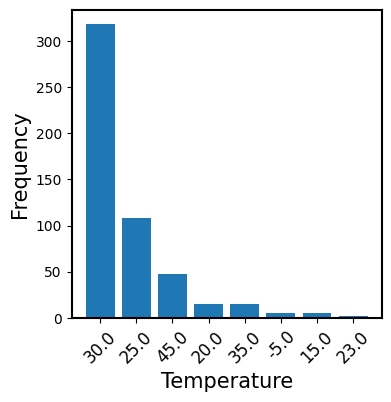

In [45]:
gate_frequency = sorted(gate_frequency.items(), key=lambda x:x[1], reverse=True)
numbers = []
things = []
for (thing, number) in gate_frequency:
    things.append(thing)
    numbers.append(number)


fig = plt.figure(figsize=(4,4))
if gate_data == 'cathodes':
    plt.xlabel('Cathode', fontsize=15)
elif gate_data == 'temperatures':
    plt.xlabel('Temperature', fontsize=15)
elif gate_data == 'formats':
    plt.xlabel('Format', fontsize=15)
elif gate_data == 'anodes':
    plt.xlabel('Anode', fontsize=15)

plt.bar([i for i in range(len(numbers))],numbers)
plt.ylabel('Frequency', fontsize=15)

set_ax_linewidth(fig.gca())
plt.xticks(ticks=range(len(things)), labels=things, rotation=45, fontsize=12)
plt.show()